In [1]:
# notebook with basic loading tests for dataset classes

In [2]:
# dataset_base
# comparison: permutation of checkpoint -> vectorization -> slicing
import logging
logging.basicConfig(level=logging.WARNING)

from pathlib import Path
import json
from shrp.datasets.dataset_base import ModelDatasetBase

In [2]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
#     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

# path_root = Path('/netscratch2/dtaskiran/zoos/MNIST/tune_zoo_mnist_uniform/')
path_root = Path('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')

dataset_test = ModelDatasetBase(
    root=path_root,
    epoch_lst=[5,10],
    mode="checkpoint",
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15,0.15],  #
    max_samples=10,
    weight_threshold=float("inf"),
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=4,
    shuffle_path=True,
    verbosity=3,
)

2023-01-31 18:03:53,510	INFO worker.py:1538 -- Started a local Ray instance.


loading checkpoints from [PosixPath('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')]


100%|██████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.84it/s]


Data loaded. found 14 usable samples out of potential 14 samples.
Load properties for samples from paths.
### load data for dict_keys(['test_acc', 'training_iteration', 'ggap'])


0it [00:00, ?it/s]


training iteration 4 and epoch 5 don't match.
### load data for dict_keys(['test_acc', 'training_iteration', 'ggap'])


14it [00:00, 37.23it/s]

Properties loaded.


In [3]:
len(dataset_test)

14

In [4]:
weights_per_channel = dataset_test.__get_weights_per_channel__()

100%|██████████████████████████████████████████████████████████████| 14/14 [00:11<00:00,  1.21it/s]


In [5]:
len(weights_per_channel)

14

In [6]:
idx = 4
len(weights_per_channel[idx])

18

In [7]:

dataset_test.channel_labels

['layer_0-conv1.weight',
 'layer_6-layer1.0.conv1.weight',
 'layer_12-layer1.0.conv2.weight',
 'layer_18-layer1.1.conv1.weight',
 'layer_24-layer1.1.conv2.weight',
 'layer_30-layer2.0.conv1.weight',
 'layer_36-layer2.0.conv2.weight',
 'layer_48-layer2.1.conv1.weight',
 'layer_54-layer2.1.conv2.weight',
 'layer_60-layer3.0.conv1.weight',
 'layer_66-layer3.0.conv2.weight',
 'layer_78-layer3.1.conv1.weight',
 'layer_84-layer3.1.conv2.weight',
 'layer_90-layer4.0.conv1.weight',
 'layer_96-layer4.0.conv2.weight',
 'layer_108-layer4.1.conv1.weight',
 'layer_114-layer4.1.conv2.weight',
 'layer_120-fc.weight']

In [10]:
count = 0
for jdx in range(len(dataset_test.weights[idx])):
    print(dataset_test.weights[idx][jdx].shape)
    count += dataset_test.weights[idx][jdx].numel()
print(count) # ought to be 2464 for normal MNIST-Seed

torch.Size([64, 27])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([64, 576])
torch.Size([128, 576])
torch.Size([128, 1152])
torch.Size([128, 1152])
torch.Size([128, 1152])
torch.Size([256, 1152])
torch.Size([256, 2304])
torch.Size([256, 2304])
torch.Size([256, 2304])
torch.Size([512, 2304])
torch.Size([512, 4608])
torch.Size([512, 4608])
torch.Size([512, 4608])
torch.Size([10, 513])
10992330


# test new model dataset class with epoch resolution

In [1]:
# dataset_base
from pathlib import Path
import json
from shrp.datasets.dataset_epochs import ModelDatasetBaseEpochs

In [ ]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
#     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

# path_root = Path('/netscratch2/dtaskiran/zoos/MNIST/tune_zoo_mnist_uniform/')
path_root = Path('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/')
# path_root = Path('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')

dataset_ep_test = ModelDatasetBaseEpochs(
    root=path_root,
    epoch_lst=list(range(0,51)),
    mode="checkpoint",
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15,0.15],  #
#     max_samples=10,
    weight_threshold=float("inf"),
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=4,
    shuffle_path=True,
    verbosity=3,
)

2023-03-12 20:39:09,403	INFO worker.py:1538 -- Started a local Ray instance.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35700/35700 [04:12<00:00, 141.54it/s]
0it [00:00, ?it/s]
ERROR:root:Exception occurred: training iteration 0 and epoch 1 don't match.
Traceback (most recent call last):
  File "/netscratch2/kschuerholt/code/shrp/src/shrp/datasets/dataset_epochs.py", line 204, in __init__
    self.read_properties(
  File "/netscratch2/kschuerholt/code/shrp/src/shrp/datasets/dataset_epochs.py", line 293, in read_properties
    assert (
AssertionError: training iteration 0 and epoch 1 don't match.
692it [02:44,  4.39it/s]

In [10]:
print(len(dataset_ep_test.data))
print(len(dataset_ep_test.paths))
print(len(dataset_ep_test.epochs))
print(len(dataset_ep_test.labels))

for key in dataset_ep_test.properties.keys():
    print(len(dataset_ep_test.properties[key]))

700
700
700
700
700
700
700


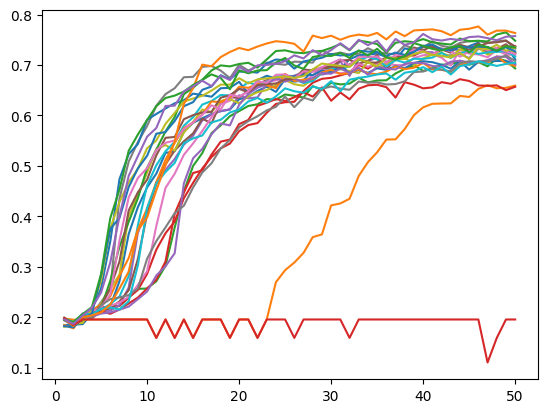

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

for idx in range(25):
    sns.lineplot(x=dataset_ep_test.properties['training_iteration'][idx],y=dataset_ep_test.properties['test_acc'][idx],ax=ax)

In [ ]:
lst = [
    [1, 2, None],
    [None, 2, None],
    [3,1,2],
    [1,None,2],
]
lst2 = [1,2,1,None,None,1,None]

In [ ]:
lst2clean = [ddx for ddx in lst2 if ddx]
lst2clean

In [ ]:
lst = [[ddx for ddx in lst[idx] if ddx] for idx in range(len(lst))]

In [ ]:
lst

In [14]:
for key in dataset_ep_test.data[0][2].keys():
    print(key)
    print(dataset_ep_test.data[0][2][key].shape)

module_list.0.weight
torch.Size([8, 1, 5, 5])
module_list.0.bias
torch.Size([8])
module_list.3.weight
torch.Size([6, 8, 5, 5])
module_list.3.bias
torch.Size([6])
module_list.6.weight
torch.Size([4, 6, 2, 2])
module_list.6.bias
torch.Size([4])
module_list.9.weight
torch.Size([20, 36])
module_list.9.bias
torch.Size([20])
module_list.11.weight
torch.Size([10, 20])
module_list.11.bias
torch.Size([10])


In [18]:
import torch
w = torch.randn([5,15])
b = torch.randn([5])

w2 = torch.cat([w,b.unsqueeze(dim=1)],dim=1)
w2.shape

torch.Size([5, 16])

In [21]:
w.shape
w.numel()

75

In [22]:
w3 = torch.randn([5,5,3])
w3.numel()

75

In [23]:
w4 = w.view(w3.shape)
w4.shape

torch.Size([5, 5, 3])

# Test SimCLRDataset

In [1]:
# dataset_base

import logging
logging.basicConfig(level=logging.WARNING)

from pathlib import Path
import json
from shrp.datasets.dataset_simclr import SimCLRDataset

from shrp.git_re_basin.git_re_basin import (
    PermutationSpec,
    zoo_cnn_permutation_spec,
    weight_matching,
    apply_permutation,
)

# import logging
# logging.basicConfig(level=logging.DEBUG)

In [32]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
#     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

# path_root = Path('/netscratch2/dtaskiran/zoos/MNIST/tune_zoo_mnist_uniform/')
path_root = Path('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/')
# path_root = Path('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')

dataset_ep_test = SimCLRDataset(
    root=path_root,
    epoch_lst=[5],
    mode="checkpoint",
#     mode="vector",
    permutations_number=0,
    permutation_spec = zoo_cnn_permutation_spec(),
    view_1_canonical = False,
    view_2_canonical = False,
    add_noise_view_1 = 0.0,  # [('input', 0.15), ('output', 0.013)]
    add_noise_view_2 = 0.0,  # [('input', 0.15), ('output', 0.013)]
    erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
    windowsize = 5,
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15,0.15],  #
    max_samples=15,
    weight_threshold=float("inf"),
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=4,
    shuffle_path=True,
    verbosity=3,
)

2023-03-15 00:07:43,744	INFO worker.py:1538 -- Started a local Ray instance.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.15it/s]
0it [00:00, ?it/s]
ERROR:root:Exception occurred: training iteration 4 and epoch 5 don't match.
Traceback (most recent call last):
  File "/netscratch2/kschuerholt/code/shrp/src/shrp/datasets/dataset_epochs.py", line 204, in __init__
    self.read_properties(
  File "/netscratch2/kschuerholt/code/shrp/src/shrp/datasets/dataset_epochs.py", line 293, in read_properties
    assert (
AssertionError: training iteration 4 and epoch 5 don't match.
10it [00:00, 220.84it/s]


In [8]:
dataset_ep_test.set_module_window(windowsize = 3)

In [9]:
print(type(dataset_ep_test.data[0][-1]))
print(len(dataset_ep_test.data[0][-1]))
# print(len(dataset_ep_test.data[0][-1][0]))

<class 'collections.OrderedDict'>
10


In [ ]:
# idea:
have index tensor 1: within components
index tensor 2: numbers per component
# permute both


In [3]:
import copy
import torch
import ray
if ray.is_initialized():
    ray.shutdown()
from shrp.datasets.progress_bar import ProgressBar

def precompute_permutations(ref_checkpoint,permutation_number, perm_spec, num_threads=6):
        logging.info("start precomputing permutations")
        model_curr = ref_checkpoint
        # find permutation of model to itself as reference
        reference_permutation = weight_matching(
            ps=perm_spec, params_a=model_curr, params_b=model_curr
        )

        logging.info("get random permutation dicts")
        # compute random permutations
        permutation_dicts = []
        for ndx in range(permutation_number):
            perm = copy.deepcopy(reference_permutation)
            for key in perm.keys():
                # get permuted indecs for current layer
                perm[key] = torch.randperm(perm[key].shape[0]).float()
            # append to list of permutation dicts
            permutation_dicts.append(perm)


        logging.info("get permutation indices")
        # get permutation data
        ## get reference checkpoint
        ref_checkpoint = copy.deepcopy(model_curr)
        ## vectoirze
        ref_vec_global = vectorize_checkpoint(ref_checkpoint)
        ref_vec_kernel = copy.deepcopy(ref_vec_global)
        ## get reference index vec
        for idx, module in enumerate(ref_vec_global):
            # get global index of permutation between kernels
            index_global = torch.ones(module.numel())*idx
            index_global = index_global.view(module.shape)
            ref_vec_global[idx] = index_global
            # got local index of permutation within kernels
            index_kernel = torch.tensor(list(range(module.numel())))
            index_kernel = index_kernel.view(module.shape)
            ref_vec_kernel[idx] = index_kernel
        ## map to checkpoint
        ref_checkpoint_global = vector_to_checkpoint(
            vector=ref_vec_global, reference_checkpoint=ref_checkpoint
        )
        ref_checkpoint_kernel = vector_to_checkpoint(
            vector=ref_vec_kernel, reference_checkpoint=ref_checkpoint
        )
                                             

        ## init multiprocessing environment ############
        ray.init(num_cpus=num_threads)
        pb = ProgressBar(total=permutation_number)
        pb_actor = pb.actor
        # get permutations
        permutations_global = []
        permutations_kernel = []
        for perm_dict in permutation_dicts:
            perm_curr_global = compute_single_perm.remote(
                reference_checkpoint=ref_checkpoint_global,
                permutation_dict=perm_dict,
                perm_spec=perm_spec,
                pba=pb_actor,
            )
            
            perm_curr_kernel = compute_single_perm.remote(
                reference_checkpoint=ref_checkpoint_kernel,
                permutation_dict=perm_dict,
                perm_spec=perm_spec,
                pba=pb_actor,
            )
            
            permutations_global.append(perm_curr_global)
            permutations_kernel.append(perm_curr_kernel)

        permutations_global = ray.get(permutations_global)
        permutations_kernel = ray.get(permutations_kernel)
                
        permutations_global = [torch.tensor([perm[0].item() for perm in perm_g]).int() for perm_g in permutations_global]

        permutations = [(perm_g, perm_k) for (perm_g, perm_k) in zip(permutations_global,permutations_kernel)]
                
        ray.shutdown()
        
        return permutation_dicts, permutations
    
@ray.remote(num_returns=1)
def compute_single_perm(reference_checkpoint, permutation_dict, perm_spec, pba):
    # copy reference checkpoint
    index_check = copy.deepcopy(reference_checkpoint)
    # apply permutation on checkpoint
    index_check_perm = apply_permutation(
        ps=perm_spec, perm=permutation_dict, params=index_check
    )
    # vectorize
    index_perm = vectorize_checkpoint(index_check_perm)
    # update counter
    pba.update.remote(1)
    # return list
    return index_perm


In [5]:
def vectorize_checkpoint(checkpoint):
    out = []
    # use only weights and biases
    for key in checkpoint.keys():
        if "weight" in key:
            w = checkpoint[key]
            # flatten to out_channels x n
            w = w.view(w.shape[0], -1)
            # cat biases to channels if they exist in checkpoint
            if key.replace("weight", "bias") in checkpoint:
                b = checkpoint[key.replace("weight", "bias")]
                w = torch.cat([w, b.unsqueeze(dim=1)], dim=1)
            # split weights in slices along output channel dims
            w = torch.split(w, w.shape[0])
            # extend out with new tokens, zero's (and only entry) is a list
            out.extend(w[0])

    return out


def vector_to_checkpoint(vector, reference_checkpoint):
    # make copy to prevent memory management issues
    checkpoint = copy.deepcopy(reference_checkpoint)
    # use only weights and biases
    idx_start = 0
    for key in checkpoint.keys():
        if "weight" in key:
            # get correct slice of modules out of vec sequence
            out_channels = checkpoint[key].shape[0]
            idx_end = idx_start + out_channels
            w = vector[idx_start:idx_end]
            # update start
            idx_start = idx_end
            # get weight matrix from list of vectors
            w = torch.stack(w, dim=0)
            # extract bias
            if key.replace("weight", "bias") in checkpoint:
                b = w[:, -1]
                checkpoint[key.replace("weight", "bias")] = b
                w = w[:, :-1]
            # reshape weight vector
            w = w.view(checkpoint[key].shape)
            logging.debug(
                f"vector_to_checkpoint: created weight {w.shape} for checkpoint weight {checkpoint[key].shape}"
            )
            checkpoint[key] = w
    return checkpoint

In [6]:
permdicts, perms = precompute_permutations(ref_checkpoint=dataset_ep_test.data[0][-1],permutation_number=3, perm_spec=zoo_cnn_permutation_spec())

2023-03-14 23:54:58,595	INFO worker.py:1538 -- Started a local Ray instance.


In [7]:
permdicts

[{'P_bg0': tensor([5., 1., 2., 7., 6., 3., 4., 0.]),
  'P_bg1': tensor([1., 3., 2., 4., 5., 0.]),
  'P_bg2': tensor([2., 1., 3., 0.]),
  'P_bg3': tensor([19.,  0.,  8., 12.,  9.,  6.,  7.,  5., 10., 13.,  1.,  3., 17., 11.,
           4., 16., 18., 14.,  2., 15.])},
 {'P_bg0': tensor([2., 0., 4., 5., 1., 6., 7., 3.]),
  'P_bg1': tensor([0., 2., 1., 4., 3., 5.]),
  'P_bg2': tensor([2., 0., 3., 1.]),
  'P_bg3': tensor([12., 13., 18., 15.,  3., 16.,  7.,  0., 19.,  6., 11.,  1., 17., 10.,
           4.,  5.,  9., 14.,  2.,  8.])},
 {'P_bg0': tensor([6., 2., 7., 1., 4., 0., 5., 3.]),
  'P_bg1': tensor([3., 1., 0., 2., 5., 4.]),
  'P_bg2': tensor([0., 2., 1., 3.]),
  'P_bg3': tensor([ 8., 16.,  3.,  2., 14., 13.,  7.,  4., 15., 17., 19., 11., 12.,  1.,
           6., 18.,  5.,  0.,  9., 10.])}]

In [8]:
print(len(perms))
print(len(perms[0]))

3
2


In [9]:
print(type(perms[0]))
print(len(perms[0]))
print(perms[0][0])

<class 'tuple'>
2
tensor([ 5,  1,  2,  7,  6,  3,  4,  0,  9, 11, 10, 12, 13,  8, 16, 15, 17, 14,
        37, 18, 26, 30, 27, 24, 25, 23, 28, 31, 19, 21, 35, 29, 22, 34, 36, 32,
        20, 33, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=torch.int32)


In [10]:
def permute_model_vector(vec,idx_start,window,perm):
    # create index vector of tokens
    index = list(range(len(vec)))
    
    # apply global permutation on index
    # using (slices of) the permuted index to access tokens equals permuting all tokens and slicing after
    perm_glob = perm[0]
    index = [index[idx] for idx in perm_glob]
    
    # slice index
    idx_end = idx_start + window
    index = index[idx_start:idx_end]
    
    # slice token sequence
    vec = [vec[idx] for idx in index] 
        
    # slice permutations
    perm_loc = perm[1]
    perm_loc = [perm_loc[idx] for idx in index]

    # apply token permutation
    vec = [vecdx[permdx] for (vecdx,permdx) in zip(vec,perm_loc)]
    
    # return tokens
    return vec

In [11]:
check1 = dataset_ep_test.data[0][-1]
print(type(check1))
vec1 = vectorize_checkpoint(check1)
print(type(vec1))
print(len(vec1))

<class 'collections.OrderedDict'>
<class 'list'>
48


# Test 1: computational load - compare permutations on checkpoint with permutation on vector

In [13]:
import random

In [15]:
%%timeit
# baseline - how long does it take to draw a random integer
idx = random.randint(0,len(dataset_ep_test.data))

1.57 µs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
# prepare a list of vecs
vecs = []
for idx in range(len(dataset_ep_test.data)):
    checkdx = dataset_ep_test.data[idx][-1]
    vecdx = vectorize_checkpoint(checkdx)
    vecs.append(vecdx)

In [17]:
%%timeit
# compute random sliced permutations
idx = random.randint(0,len(vecs)-1)
perm1 = perms[0]
vec1 = vecs[idx]
vec2 = permute_model_vector(vec=vec1,idx_start=2,window=13,perm=perm1)

154 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [143]:
# comparison: permute checkpoints -> vectorize -> slice

7

In [20]:
%%timeit

idx = random.randint(0,len(dataset_ep_test.data)-1)

check1 = dataset_ep_test.data[idx][-1]

permd = permdicts[0]

check_perm = apply_permutation(ps=zoo_cnn_permutation_spec(), perm=permd, params=check1)

vec3 = vectorize_checkpoint(check_perm )

vec4 = vec3[2:15]


616 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


permutation on vectorized form appears <25% of the runtime of permutation on the checkpoint

# test 2: check slice of permutation ar the same to sliced permutations

In [127]:
# check that slice of permuted model is the same as permute/slice at the same time

# since all true -> that works :)
perm1 = perms[0]
sstart = 7
slen = 34
vec2 = permute_model_vector(vec=vec1,idx_start=0,window=len(vec1),perm=perm1)
vec3 = permute_model_vector(vec=vec1,idx_start=sstart,window=slen,perm=perm1)

vec23 = vec2[sstart:sstart+slen]
for m1,m2 in zip(vec23,vec3):
    print(torch.allclose(m1,m2))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# test 3: test that permuted models have the same mapping

In [ ]:
# permute model with full window
# cast back to checkpoint
# load both checkpoint
# verify closeness of predictions

# repeat for 10 models and 15 iterations



In [25]:
# load config
from shrp.models.def_net import NNmodule
config_path = dataset_ep_test.paths[0][0].joinpath('params.json')
config = json.load(config_path.open('r'))
config['training::batchsize'] = 1000
model = NNmodule(config)

In [26]:
# load dataset
imgdata = torch.load(config['dataset::dump'].replace('netscratch','netscratch2'))

In [35]:
from shrp.datasets.def_FastTensorDataLoader import FastTensorDataLoader
n_samples = 1000

testset_1, testset_2 = torch.utils.data.random_split(
            imgdata['testset'], [n_samples, len(imgdata['testset'])-n_samples], generator=torch.Generator().manual_seed(42))

testloader_raw = torch.utils.data.DataLoader(
    dataset=testset_1, batch_size=len(testset_1), shuffle=True
        )
assert testloader_raw.__len__() == 1, "temp testloader has more than one batch"
for test_data, test_labels in testloader_raw:
    pass

testset = torch.utils.data.TensorDataset(test_data, test_labels)
testloader = FastTensorDataLoader(testset)

In [31]:
permdicts, perms = precompute_permutations(ref_checkpoint=dataset_ep_test.data[0][-1],permutation_number=15, perm_spec=zoo_cnn_permutation_spec())

2023-03-15 00:06:50,151	INFO worker.py:1538 -- Started a local Ray instance.


In [36]:
check1 = dataset_ep_test.data[0][-1]
permd = permdicts[0]
check_perm = apply_permutation(ps=zoo_cnn_permutation_spec(), perm=permd, params=check1)

print('load first checkpoint')
model.model.load_state_dict(check1)
print('compute predictions of first checkpoint')
with torch.no_grad():
    pred1 = model(test_data)
    
print('load permuted checkpoint')
model.model.load_state_dict(check_perm)
print('compute predictions of permuted checkpoint')
with torch.no_grad():
    pred2 = model(test_data)
    
print('check equality')
torch.allclose(pred1,pred2)

load first checkpoint
compute predictions of first checkpoint
load permuted checkpoint
compute predictions of permuted checkpoint
check equality


True

In [45]:
import tqdm

n_models = 10
n_perms = 15

res = []

for idx in tqdm.tqdm(range(n_models)):
    for jdx in range(n_perms):

        check1 = dataset_ep_test.data[idx][-1]
        permd = permdicts[jdx]
        check_perm = apply_permutation(ps=zoo_cnn_permutation_spec(), perm=permd, params=check1)

#         print('load first checkpoint')
        model.model.load_state_dict(check1)
#         print('compute predictions of first checkpoint')
        with torch.no_grad():
            pred1 = model(test_data)

#         print('load permuted checkpoint')
        model.model.load_state_dict(check_perm)
#         print('compute predictions of permuted checkpoint')
        with torch.no_grad():
            pred2 = model(test_data)

#         print('check equality')
        restmp = torch.allclose(pred1,pred2)
        if not restmp:
            print(torch.allclose(pred1,pred2,atol=1e-05, rtol=1e-03))
        res.append(restmp)

 30%|███████████████████████████████████████████████▍                                                                                                              | 3/10 [00:52<02:02, 17.52s/it]

True
True


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:01<00:00, 18.12s/it]


In [44]:
print(sum(res)/len(res))

0.9866666666666667


In [ ]:
# test the same on vector level

In [46]:
# prepare a list of vecs
vecs = []
for idx in range(len(dataset_ep_test.data)):
    checkdx = dataset_ep_test.data[idx][-1]
    vecdx = vectorize_checkpoint(checkdx)
    vecs.append(vecdx)

In [47]:
vec1 = vecs[0]
perm1 = perms[0]

vecperm = permute_model_vector(vec=vec1,idx_start=0,window=len(vec1),perm=perm1)

check1 = vector_to_checkpoint(vector=vec1, reference_checkpoint=check1)
check_perm = vector_to_checkpoint(vector=vecperm, reference_checkpoint=check1)

print('load first checkpoint')
model.model.load_state_dict(check1)
print('compute predictions of first checkpoint')
with torch.no_grad():
    pred1 = model(test_data)
    
print('load permuted checkpoint')
model.model.load_state_dict(check_perm)
print('compute predictions of permuted checkpoint')
with torch.no_grad():
    pred2 = model(test_data)
    
print('check equality')
torch.allclose(pred1,pred2)

load first checkpoint
compute predictions of first checkpoint
load permuted checkpoint
compute predictions of permuted checkpoint
check equality


True

In [48]:
import tqdm

n_models = 10
n_perms = 15

res = []

for idx in tqdm.tqdm(range(n_models)):
    for jdx in range(n_perms):

        vec1 = vecs[idx]
        perm1 = perms[jdx]

        vecperm = permute_model_vector(vec=vec1,idx_start=0,window=len(vec1),perm=perm1)

        check1 = vector_to_checkpoint(vector=vec1, reference_checkpoint=check1)
        check_perm = vector_to_checkpoint(vector=vecperm, reference_checkpoint=check1)

#         print('load first checkpoint')
        model.model.load_state_dict(check1)
#         print('compute predictions of first checkpoint')
        with torch.no_grad():
            pred1 = model(test_data)

#         print('load permuted checkpoint')
        model.model.load_state_dict(check_perm)
#         print('compute predictions of permuted checkpoint')
        with torch.no_grad():
            pred2 = model(test_data)

#         print('check equality')
        restmp = torch.allclose(pred1,pred2)
        if not restmp:
            print(torch.allclose(pred1,pred2,atol=1e-05, rtol=1e-03))
        res.append(restmp)

 30%|███████████████████████████████████████████████▍                                                                                                              | 3/10 [00:55<02:10, 18.58s/it]

True
True


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:04<00:00, 18.49s/it]


In [52]:
lst = [
    torch.tensor([1,2,3]),
    torch.tensor([21,22,23]),
    torch.tensor([31,32,33]),
]

tst = torch.stack(lst,dim=0).float()
tst

tensor([[ 1.,  2.,  3.],
        [21., 22., 23.],
        [31., 32., 33.]])

In [53]:
torch.mean(tst)

tensor(18.6667)

In [54]:
torch.std(tst)

tensor(13.2571)

In [ ]:
# test dataset with standardization, permutation, map to canonical


In [1]:
# dataset_base

import logging
# logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.DEBUG)

from pathlib import Path
import json
from shrp.datasets.dataset_simclr import SimCLRDataset

from shrp.git_re_basin.git_re_basin import (
    PermutationSpec,
    zoo_cnn_permutation_spec,
    weight_matching,
    apply_permutation,
)

In [2]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
#     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

# path_root = Path('/netscratch2/dtaskiran/zoos/MNIST/tune_zoo_mnist_uniform/')
path_root = Path('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/')
# path_root = Path('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')

dataset_ep_test = SimCLRDataset(
    root=path_root,
    epoch_lst=[1,5,25],
#     mode="checkpoint",
    mode="vector",
    permutations_number=0,
    permutation_spec = zoo_cnn_permutation_spec(),
#     view_1_canonical = False,
    view_1_canonical = False,
    view_2_canonical = True,
#     view_2_canonical = False,
    add_noise_view_1 = 0.1,  # [('input', 0.15), ('output', 0.013)]
    add_noise_view_2 = 0.0,  # [('input', 0.15), ('output', 0.013)]
    noise_multiplicative=True,
    erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
    windowsize = 12,
    standardize=True,
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15,0.15],  #
    max_samples=15,
    weight_threshold=float("inf"),
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=4,
    shuffle_path=True,
    verbosity=3,
)

2023-03-18 00:13:11,412	INFO worker.py:1538 -- Started a local Ray instance.
INFO:root:loading checkpoints from [PosixPath('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform')]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.11it/s]
INFO:root:Data loaded. found 10 usable samples out of potential 30 samples.
INFO:root:Load properties for samples from paths.
INFO:root:### load data for dict_keys(['test_acc', 'training_iteration', 'ggap'])
10it [00:00, 13.75it/s]
INFO:root:Properties loaded.
INFO:root:prepare canonical form
2023-03-18 00:13:22,034	INFO worker.py:1538 -- Started a local Ray instance.


preparing computing canon form...


INFO:root:init dataset length
INFO:root:Get Positions
INFO:root:vectorize data
INFO:root:Get layer mapping
DEBUG:root:layer mapping: {'0': {'start_idx': 0, 'end_idx': 7}, '1': {'start_idx': 8, 'end_idx': 13}, '2': {'start_idx': 14, 'end_idx': 17}, '3': {'start_idx': 18, 'end_idx': 37}, '4': {'start_idx': 38, 'end_idx': 47}}
INFO:root:Get layer-wise mean and std
INFO:root:Apply standardization
INFO:root:Discover tokensize


In [8]:
# Checks
# -[x] All options run without error
# -[x] NAN / INFS
# -[x] run permutation checks from above again
# -[x] check lenghts of windows
# -[x] check standardization worsk
# -[x] check noising works
# -[x] check augmentations are applied correctly
# -[x] check relation of all datapoints is preserved
# -[x] check positions

# =[]comment all code 
# =[]code review while commenting
# =[]load models, compute test_acc, compare to recorded one

In [9]:
dataset_ep_test.__len__()

30

In [10]:
len(dataset_ep_test.data)

10

In [11]:
len(dataset_ep_test.data[0])

3

### test noise 

In [41]:
dataset_ep_test.set_module_window(len(dataset_ep_test.data[0][-1]))
index = 21
for _ in range(5):
    tw,_,_,_,pw = dataset_ep_test.__getitem__(index)
    print(tw[15])

tensor([ 0.6178,  1.0873,  0.0407,  0.0093,  0.5361, -0.5169,  0.6908, -0.2309,
        -0.3285,  0.1974,  0.4596,  0.4653, -0.0077,  0.2002,  0.4147, -0.5666,
         1.7816,  1.4433,  0.5817,  1.0785,  0.2645,  0.6473, -0.2172,  0.7955,
        -0.1908])
tensor([ 0.8240,  0.9750,  0.0380,  0.0066,  0.4346, -0.5247,  0.6876, -0.2180,
        -0.2840,  0.1956,  0.4612,  0.4618, -0.0086,  0.2470,  0.3720, -0.5622,
         1.3629,  1.6588,  0.5280,  1.1187,  0.2334,  0.5823, -0.2271,  0.7855,
        -0.1828])
tensor([ 0.7212,  1.0149,  0.0400,  0.0066,  0.4646, -0.4545,  0.6207, -0.2456,
        -0.3473,  0.1681,  0.4642,  0.3805, -0.0081,  0.2214,  0.4619, -0.5562,
         1.5033,  1.5660,  0.6301,  1.1723,  0.2358,  0.6135, -0.2521,  0.8279,
        -0.1709])
tensor([ 0.7916,  1.1427,  0.0344,  0.0080,  0.4719, -0.4345,  0.7106, -0.2521,
        -0.2859,  0.1705,  0.4819,  0.3783, -0.0058,  0.1908,  0.3508, -0.3702,
         1.7695,  1.4537,  0.6129,  1.0355,  0.2838,  0.6718, -0.2

seems to work as expected 

In [47]:
### check relation - checkpoint - properties
for _ in range(15):
    index = random.randint(0,len(dataset_ep_test)-1)
    _,l,_,_,pw = dataset_ep_test.__getitem__(index)
    mdx,edx = dataset_ep_test._index[index]
    props = dataset_ep_test.properties
    print(l)
    print(f"{props['test_acc'][mdx][edx]} - {props['training_iteration'][mdx][edx]}")

/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00548_548_seed=549_2021-07-27_15-51-15#_#epoch_1
0.18335125998770743 - 1
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00935_935_seed=936_2021-07-28_08-01-46#_#epoch_5
0.23044714197910265 - 5
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00257_257_seed=258_2021-07-27_03-43-04#_#epoch_1
0.19817916410571604 - 1
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00786_786_seed=787_2021-07-28_01-50-08#_#epoch_5
0.21838506453595574 - 5
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40#_#epoch_5
0.21842347879532883 - 5
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00935_935_seed=936_2021-07-28_08-01-46#_#epoch_25
0.7004456054087277 - 25
/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00935_93

### check positions

In [8]:
dataset_ep_test.positions

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9)]

### check standardization
seems to work well

In [15]:
dataset_ep_test.layers

{'0': {'start_idx': 0,
  'end_idx': 7,
  'mean': tensor(0.3796),
  'std': tensor(0.7530)},
 '1': {'start_idx': 8,
  'end_idx': 13,
  'mean': tensor(0.3528),
  'std': tensor(0.7909)},
 '2': {'start_idx': 14,
  'end_idx': 17,
  'mean': tensor(0.3028),
  'std': tensor(0.5307)},
 '3': {'start_idx': 18,
  'end_idx': 37,
  'mean': tensor(0.3382),
  'std': tensor(0.5479)},
 '4': {'start_idx': 38,
  'end_idx': 47,
  'mean': tensor(0.4690),
  'std': tensor(0.5501)}}

In [38]:
# stack all components

data = dataset_ep_test.data
print(len(data))
data = [ddx for idx in range(len(data)) for ddx in data[idx]]
print(len(data))
data = [torch.cat(ddx,dim=0)for ddx in data]
data = torch.stack(data,dim=0)
data.shape

print(f'mean: {torch.mean(data)}| std: {torch.std(data)}')
print(f'nans: {torch.isnan(data).any()} | infs: {torch.isinf(data).any()}')

10
30
mean: 1.6513841405441099e-09| std: 0.999972939491272
nans: False | infs: False


### check permutations (again)

In [1]:
# dataset_base

import logging
logging.basicConfig(level=logging.INFO)

from pathlib import Path
import json
from shrp.datasets.dataset_simclr import SimCLRDataset

from shrp.git_re_basin.git_re_basin import (
    PermutationSpec,
    zoo_cnn_permutation_spec,
    weight_matching,
    apply_permutation,
)

In [48]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
#     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

# path_root = Path('/netscratch2/dtaskiran/zoos/MNIST/tune_zoo_mnist_uniform/')
path_root = Path('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/')
# path_root = Path('/netscratch2/kschuerholt/code/versai/model_zoos/zoos/CIFAR10/resnet19/kaiming_uniform/tune_zoo_cifar10_resnet18_kaiming_uniform')

dataset_ep_test = SimCLRDataset(
    root=path_root,
    epoch_lst=[1,5,25],
#     mode="checkpoint",
    mode="vector",
    permutations_number=20,
    permutation_spec = zoo_cnn_permutation_spec(),
    view_1_canonical = False,
    view_2_canonical = True,
#     view_2_canonical = False,
    add_noise_view_1 = 0.0,  # [('input', 0.15), ('output', 0.013)]
    add_noise_view_2 = 0.0,  # [('input', 0.15), ('output', 0.013)]
    erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
#     windowsize = 12,
    standardize=False,
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15,0.15],  #
    max_samples=50,
    weight_threshold=float("inf"),
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=4,
    shuffle_path=True,
    verbosity=3,
)

2023-03-16 22:11:47,569	INFO worker.py:1538 -- Started a local Ray instance.
INFO:root:loading checkpoints from [PosixPath('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform')]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:02<00:00, 43.87it/s]
INFO:root:Data loaded. found 35 usable samples out of potential 105 samples.
INFO:root:Load properties for samples from paths.
INFO:root:### load data for dict_keys(['test_acc', 'training_iteration', 'ggap'])
35it [00:00, 80.65it/s]
INFO:root:Properties loaded.
INFO:root:prepare canonical form
2023-03-16 22:11:56,780	INFO worker.py:1538 -- Started a local Ray instance.


preparing computing canon form...


INFO:root:init dataset length
INFO:root:Get Positions
INFO:root:vectorize data
INFO:root:init permutations
INFO:root:start precomputing permutations
INFO:root:0/P_bg3: 0.0
INFO:root:0/P_bg0: 0.0
INFO:root:0/P_bg2: 0.0
INFO:root:0/P_bg1: 0.0
INFO:root:get random permutation dicts
INFO:root:get permutation indices
2023-03-16 22:12:06,684	INFO worker.py:1538 -- Started a local Ray instance.


In [50]:
dataset_ep_test.set_module_window(len(dataset_ep_test.data[0][-1]))

In [4]:
# load config
import torch
from shrp.models.def_net import NNmodule
config_path = dataset_ep_test.paths[0][0].joinpath('params.json')
config = json.load(config_path.open('r'))
config['training::batchsize'] = 1000
model = NNmodule(config)
# load dataset
imgdata = torch.load(config['dataset::dump'].replace('netscratch','netscratch2'))
from shrp.datasets.def_FastTensorDataLoader import FastTensorDataLoader
n_samples = 1000

testset_1, testset_2 = torch.utils.data.random_split(
            imgdata['testset'], [n_samples, len(imgdata['testset'])-n_samples], generator=torch.Generator().manual_seed(42))

testloader_raw = torch.utils.data.DataLoader(
    dataset=testset_1, batch_size=len(testset_1), shuffle=True
        )
assert testloader_raw.__len__() == 1, "temp testloader has more than one batch"
for test_data, test_labels in testloader_raw:
    pass

testset = torch.utils.data.TensorDataset(test_data, test_labels)
testloader = FastTensorDataLoader(testset)

INFO:root:cuda unavailable:: train model on cpu
INFO:root:=> creating model CNN
INFO:root:initialze model


In [6]:
import tqdm
import random
from shrp.datasets.dataset_simclr import vector_to_checkpoint

n_models = 10
n_perms = 15

res = []

check = dataset_ep_test.reference_checkpoint
for idx in tqdm.tqdm(range(n_models)):
        
    for jdx in range(n_perms):
        
        edx = random.randint(0,2)
        jdx = idx*3+edx
        vec1,lab1,_,_,_ = dataset_ep_test.__getitem__(jdx)
        vec2,lab2,_,_,_ = dataset_ep_test.__getitem__(jdx)

        check1 = vector_to_checkpoint(vector=vec1, reference_checkpoint=check)
        check2 = vector_to_checkpoint(vector=vec2, reference_checkpoint=check)

#         print('load first checkpoint')
        model.model.load_state_dict(check1)
#         print('compute predictions of first checkpoint')
        with torch.no_grad():
            pred1 = model(test_data)

#         print('load permuted checkpoint')
        model.model.load_state_dict(check2)
#         print('compute predictions of permuted checkpoint')
        with torch.no_grad():
            pred2 = model(test_data)

#         print('check equality')
        restmp = torch.allclose(pred1,pred2)
        if not restmp:
            print(torch.allclose(pred1,pred2,atol=1e-05, rtol=1e-03))
        res.append(restmp)

  0%|                                                                                                                                                                      | 0/10 [00:00<?, ?it/s]

True


 20%|███████████████████████████████▌                                                                                                                              | 2/10 [01:35<06:18, 47.32s/it]

True


 30%|███████████████████████████████████████████████▍                                                                                                              | 3/10 [02:22<05:32, 47.53s/it]

True


 40%|███████████████████████████████████████████████████████████████▏                                                                                              | 4/10 [03:11<04:47, 47.99s/it]

True
True


 50%|███████████████████████████████████████████████████████████████████████████████                                                                               | 5/10 [04:03<04:07, 49.44s/it]

True


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 8/10 [06:24<01:35, 47.89s/it]

True
True
True


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 9/10 [07:17<00:49, 49.68s/it]

True
True
True


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:10<00:00, 49.08s/it]


No errors, all close enough with relaxed tolerances. Permutations still work 

### compare recorded to computed accuracy

In [55]:
import tqdm
import random
from shrp.datasets.dataset_simclr import vector_to_checkpoint

repetitions = 10

res = []

check = dataset_ep_test.reference_checkpoint
for idx in tqdm.tqdm(range(repetitions)):
        
    kdx = random.randint(0,len(dataset_ep_test)-1)
    mdx,edx = dataset_ep_test._index[kdx]
    vec1,lab1,vec2,_,_ = dataset_ep_test.__getitem__(kdx)

    check1 = vector_to_checkpoint(vector=vec1, reference_checkpoint=check)
    check2 = vector_to_checkpoint(vector=vec2, reference_checkpoint=check)

#         print('load first checkpoint')
    model.model.load_state_dict(check1)
#         print('compute predictions of first checkpoint')
    with torch.no_grad():
        loss_1,acc_1 = model.test_epoch(testloader,epoch=0)

#         print('load permuted checkpoint')
    model.model.load_state_dict(check2)
#         print('compute predictions of permuted checkpoint')
    with torch.no_grad():
        loss_2,acc_2 = model.test_epoch(testloader,epoch=0)

#         print('check equality')

    acc_recorded = dataset_ep_test.properties['test_acc'][mdx][edx]
    restmp_pair = torch.allclose(torch.tensor(acc_1),torch.tensor(acc_2),atol=1e-02, rtol=1e-03)
    restmp_base = torch.allclose(torch.tensor(acc_1),torch.tensor(acc_recorded),atol=1e-02, rtol=1e-03)
    if not (restmp_pair and restmp_base):
        print(f'acc_1: {acc_1} | acc_2: {acc_2} | acc_rec: {acc_recorded}')
    res.append(restmp)

  0%|                                                                                                                                                                      | 0/10 [00:00<?, ?it/s]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.180163366317749; accuracy: 0.213
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.180163356781006; accuracy: 0.213
 10%|███████████████▊                                                                                                                                              | 1/10 [01:25<12:50, 85.60s/it]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 1.1837517328262328; accuracy: 0.614
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 1.1837517595291138; accuracy: 0.614
 20%|███████████████████████████████▌                                                                                                                              | 2/10 [02:29<09:44, 73.01s/it]INFO:root:validate at epoch 0


acc_1: 0.614 | acc_2: 0.614 | acc_rec: 0.6262676705593117


INFO:root:test ::: loss: 2.2183909492492675; accuracy: 0.197
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.2183907890319823; accuracy: 0.197
 30%|███████████████████████████████████████████████▍                                                                                                              | 3/10 [03:47<08:46, 75.24s/it]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.0843050088882444; accuracy: 0.276
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.0843049564361573; accuracy: 0.276
 40%|███████████████████████████████████████████████████████████████▏                                                                                              | 4/10 [05:23<08:20, 83.48s/it]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.2148335647583006; accuracy: 0.198
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.2148336029052733; accuracy: 0.198
 50%|███████████████████████████████████████████████████████████████████████████████            

acc_1: 0.653 | acc_2: 0.653 | acc_rec: 0.6694068838352797


INFO:root:test ::: loss: 2.191834867477417; accuracy: 0.219
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.1918348865509034; accuracy: 0.219
 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 8/10 [10:24<02:38, 79.29s/it]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 1.1670266799926758; accuracy: 0.649
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 1.167026635169983; accuracy: 0.649
 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 9/10 [11:24<01:13, 73.54s/it]INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.109017961502075; accuracy: 0.292
INFO:root:validate at epoch 0
INFO:root:test ::: loss: 2.1090178623199463; accuracy: 0.292
100%|██████████████████████████████████████████████████████████████████████████████████████████████

In [59]:
t1 = torch.randn(3)
t2 = torch.randn(5)
t3 = torch.randn(4)

t = [t1,t2,t3]

In [60]:
t

[tensor([0.3595, 0.7960, 0.8118]),
 tensor([0.8026, 0.0560, 0.8345, 1.0049, 1.4833]),
 tensor([-0.0634,  2.2114, -0.4224, -0.2023])]

In [62]:
out = torch.zeros(len(t),5)
out

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [81]:
from typing import List


def tokenize(t:List[torch.tensor],tokensize:int)->torch.tensor:
    """
    transforms list of tokens of differen lenght to tensor
    input t: List[torch.tensor]: list of 1d input tokens of different lenghts
    input tokensize: int output dimension of each token
    return out: torch.tensor
    """
    # init output with zeros
    tokens = torch.zeros(len(t),tokensize)
    mask = torch.zeros(len(t),tokensize)
    # iterate over inputs
    for idx,tdx in enumerate(t):
        # get end of token, either the length of the input or them maximum length
        tdx_end = min(tdx.shape[0],tokensize)
        # put at position idx
        tokens[idx,:tdx_end] = tdx[:tdx_end]
        mask[idx,:tdx_end] = torch.ones(tdx_end)
        
    # return
    return tokens,mask


In [82]:
tt,mt = tokenize(t,tokensize=6)
print(tt)
print(mt)

tensor([[ 0.3595,  0.7960,  0.8118,  0.0000,  0.0000,  0.0000],
        [ 0.8026,  0.0560,  0.8345,  1.0049,  1.4833,  0.0000],
        [-0.0634,  2.2114, -0.4224, -0.2023,  0.0000,  0.0000]])
tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0., 0.]])


tensor([[ 0.3595,  0.7960,  0.8118,  0.0000,  0.0000],
        [ 0.8026,  0.0560,  0.8345,  1.0049,  1.4833],
        [-0.0634,  2.2114, -0.4224, -0.2023,  0.0000]])

# test position embeddings

In [6]:
import torch
testloader = torch.utils.data.DataLoader(dataset_ep_test,batch_size=5)

In [13]:
w1,m1,l1,w2,m2,l2,p = next(iter(testloader))
print(w1.shape)
print(m1.shape)
print(l1)
print(w2.shape)
print(m2.shape)
print(l2)
print(p.shape)

torch.Size([5, 12, 201])
torch.Size([5, 12, 201])
('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40#_#epoch_1', '/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40#_#epoch_5', '/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40#_#epoch_25', '/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00689_689_seed=690_2021-07-27_21-54-40#_#epoch_1', '/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00689_689_seed=690_2021-07-27_21-54-40#_#epoch_5')
torch.Size([5, 12, 201])
torch.Size([5, 12, 201])
('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40#_#epoch_1#_#canon', '/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021

In [31]:
import torch.nn as nn
class PositionEmbs(nn.Module):
    """Adds learned positional embeddings to the inputs.
    Attributes:
        posemb_init: positional embedding initializer.
        max_positions: maximum number of positions to embed.
        embedding_dim: dimension of the input embeddings.
    """

    def __init__(self, max_positions=[48,256], embedding_dim=128):
        super().__init__()
        self.max_positions = max_positions
        self.embedding_dim = embedding_dim
        self.pe1 = nn.Embedding(max_positions[0], embedding_dim//2)
        self.pe2 = nn.Embedding(max_positions[1], embedding_dim//2)

    def forward(self, inputs, pos):
        """Applies the AddPositionEmbs module.
        Args:
            inputs: Inputs to the layer, shape `(batch_size, seq_len, emb_dim)`.
            pos: Position of the first token in each sequence, shape `(batch_size,seq_len,2)`.
        Returns:
            Output tensor with shape `(batch_size, seq_len, emb_dim + 2)`.
        """
        assert (
            inputs.ndim == 3
        ), f"Number of dimensions should be 3, but it is {inputs.ndim}"
        assert (
            pos.shape[2] == 2
        ), "Position tensors should have two dimensions (layer, module in layer)"
        assert (
            pos.shape[0] == inputs.shape[0]
        ), "Position tensors should have the same batch size as inputs"
        assert (
            pos.shape[1] == inputs.shape[1]
        ), "Position tensors should have the same seq length as inputs"

        # TODO: fix embeding code
        pos_emb1 = self.pe1(pos[:,:,0])
        pos_emb2 = self.pe2(pos[:,:,1])
        pos_emb = torch.cat([pos_emb1,pos_emb2],dim=2)
        
        out = torch.cat([inputs,pos_emb],dim=2)
        return out

In [32]:
PosEmbs = PositionEmbs()

In [33]:
print(p.shape)
pse = PosEmbs(w1,p)
print(pse.shape)

torch.Size([5, 12, 2])
torch.Size([5, 12, 329])


tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 7]])
tensor([[ 5, 12],
        [21, 28]])


In [41]:
for idx in range(5):
    if idx==3:
        break
print('yes')

yes


In [42]:
data = [[None,1,2,4],[3,None,1],[None,None]]

In [44]:
data = [[ddx for ddx in data[idx] if ddx] for idx in range(len(data))]
data = [ddx for ddx in data if len(ddx)>0]
data

[[1, 2, 4], [3, 1]]

In [45]:
path = Path('/netscratch2/kschuerholt/code/shrp/experiments/02_representation_learning/01_test/tune/ae_resnet_test_subset/dataset.pt')
dataset = torch.load(path)

In [49]:
testset = dataset['testset']
print(len(testset.data))
print(len(testset.data[0]))
print(len(testset.data[0][0]))
print(len(testset.data[0][0][0]))

15
3
9610
27


In [51]:
testset.tokensize

4608

# benchmark dataset

In [1]:
#
import logging

logging.basicConfig(level=logging.INFO)

from pathlib import Path
import json
from shrp.datasets.dataset_simclr import SimCLRDataset

from shrp.git_re_basin.git_re_basin import (
    PermutationSpec,
    zoo_cnn_permutation_spec,
    weight_matching,
    apply_permutation,
)

from shrp.models.def_AE_module import AEModule

# from lightning.fabric import Fabric
# from lightning.fabric.strategies import SingleDeviceStrategy

import torch

# from torch.profiler import profile, record_function, ProfilerActivity

import random

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpljm_5ej0
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpljm_5ej0/_remote_module_non_scriptable.py


In [ ]:
# without permutations

In [2]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
    #     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

path_root = Path("/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/")

dataset_train = SimCLRDataset(
    root=path_root,
    epoch_lst=[1, 5, 20, 25],
#     epoch_lst=list(range(1, 26)),
    #     mode="checkpoint",
    mode="vector",
    permutations_number=0,
    permutation_spec=zoo_cnn_permutation_spec(),
    #     view_1_canonical = False,
    view_1_canonical=True,
    view_2_canonical=True,
    #     view_2_canonical = False,
    add_noise_view_1=0.1,  # [('input', 0.15), ('output', 0.013)]
    add_noise_view_2=0.0,  # [('input', 0.15), ('output', 0.013)]
    noise_multiplicative=True,
    erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
    windowsize=12,
    standardize=True,
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15, 0.15],  #
    max_samples=1000,
    # weight_threshold=float("inf"),
    weight_threshold=15,
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=6,
    shuffle_path=True,
    verbosity=3,
)

INFO:root:reference checkpoint found at /netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/NN_tune_trainable_97ebe_00321_321_seed=322_2021-07-27_06-12-40
2023-04-12 03:54:18,053	INFO worker.py:1553 -- Started a local Ray instance.
INFO:root:loading checkpoints from [PosixPath('/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform')]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2800/2800 [00:08<00:00, 347.48it/s]
INFO:root:Data loaded. found 700 usable samples out of potential 2800 samples.
INFO:root:Load properties for samples from paths.
INFO:root:### load data for dict_keys(['test_acc', 'training_iteration', 'ggap'])
700it [00:12, 57.73it/s]
INFO:root:Properties loaded.
INFO:root:both view 1 and view 2 are set to canonical. number of permutations is set to 0
INFO:root:prepare canonical form

preparing computing canon form...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 700/700 [00:02<00:00, 251.84it/s]
INFO:root:init dataset length
INFO:root:Get Positions
INFO:root:vectorize data
INFO:root:Get layer mapping
INFO:root:Get layer-wise mean and std
INFO:root:Apply standardization
INFO:root:Discover tokensize


### single dataset access

In [3]:
max_int = len(dataset_train)

In [12]:
%%timeit
for idx in range(64):
    kdx = random.randint(0, max_int)
    (x_i, m_i, x_j, m_j, p) = dataset_train.__getitem__(kdx)

331 ms ± 7.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


fetching one batch of 64 samples takes ~400ms (~0.4s), sequentially. 

### dataloader

In [7]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=4,
    pin_memory=True,
    prefetch_factor=2,
)

In [8]:
%%timeit

for idx, (x_i, m_i, x_j, m_j, p) in enumerate(dloader):
    continue

5.06 s ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
len(dloader)

43

In [10]:
7.55/len(dloader)

0.1755813953488372

In [16]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=8,
    pin_memory=True,
    prefetch_factor=2,
)

In [17]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

9.72 s ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=4,
    pin_memory=True,
    prefetch_factor=4,
)

In [19]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

7.68 s ± 764 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=2,
    pin_memory=True,
    prefetch_factor=2,
)

In [23]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

11 s ± 137 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=2,
    pin_memory=True,
    prefetch_factor=4,
)

In [25]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

11.4 s ± 315 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
dloader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=3,
    pin_memory=True,
    prefetch_factor=2,
)

In [27]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

8.64 s ± 365 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# with permutations

# baseline: random data

In [37]:
from torch.utils.data import Dataset
class RandomDataset(Dataset):
    """
    This dataset produces random tensors of data
    """

    # init
    def __init__(
        self,
        windowsize=12,
        tokensize=201,
        samples=1000,
        ):
        super(RandomDataset, self).__init__()
        self.windowsize=windowsize
        self.tokensize=tokensize
        self.samples = samples
    
    def __len__(self):
        return self.samples
    
    def __getitem__(self,idx):
        x_i = torch.randn(self.windowsize,self.tokensize)
        m_i = torch.randn(self.windowsize,self.tokensize)
        l_i = "123"
        x_j = torch.randn(self.windowsize,self.tokensize)
        m_j = torch.randn(self.windowsize,self.tokensize)
        l_j = "123"
        p = [(1,6) for _ in range(self.windowsize)]
        return x_i, m_i, l_i, x_j, m_j, l_j, p

In [38]:
rdataset = RandomDataset(
    windowsize=dataset_train.window,
    tokensize=dataset_train.tokensize,
    samples = dataset_train.__len__(),
)

In [39]:
%%timeit
for idx in range(64):
    kdx = random.randint(0, max_int)
    (x_i, m_i, l_i, x_j, m_j, _, p) = rdataset.__getitem__(kdx)

5.24 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


random data access is about 1% of original dataset class

In [47]:
dloader = torch.utils.data.DataLoader(
    rdataset,
    batch_size=64,
    shuffle=True,
    drop_last=True,
    num_workers=2,
    pin_memory=True,
    prefetch_factor=4,
)

In [48]:
%%timeit

for idx, (x_i, m_i, l_i, x_j, m_j, _, p) in enumerate(dloader):
    continue

1.48 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# test ffcv dataset type

In [17]:
from ffcv.writer import DatasetWriter

In [ ]:


#     RGBImageField: Handles images including (optional) compression and resizing. Pass in a PyTorch Tensor.

#     IntField and FloatField: Handle simple scalar fields. Pass in int or float.

#     BytesField: Stores byte arrays of variable length. Pass in numpy byte array.

#     JSONField: Encodes a JSON document. Pass in dict that can be JSON-encoded.


In [15]:
(x_i, m_i, x_j, m_j, p) = next(iter(dloader))
print(x_i.dtype)
print(m_i.dtype)
print(x_j.dtype)
print(m_j.dtype)
print(p.dtype)

torch.float32
torch.float32
torch.float32
torch.float32
torch.int64


In [20]:
torch.dtype('float32')

TypeError: cannot create 'torch.dtype' instances

In [25]:
from ffcv.fields import NDArrayField, FloatField, TorchTensorField
#  class ffcv.fields.TorchTensorField(dtype: torch.dtype, shape: Tuple[int, ...])[source]
# Each field corresponds to an element of the data tuple returned by our dataset, 
# and specifies how the element should be written to (and later, read from) the FFCV dataset file. 
# In our case, the dataset has two fields, one for the (vector) input and the other for the corresponding 
# (scalar) label. Both of these fields already have default implementations in FFCV, which we use below:
# (x_i, m_i, x_j, m_j, p)
w= dataset_train.window
t = dataset_train.tokensize
write_path = Path('./ffcv_test_dataset.beton')
writer = DatasetWriter(write_path, {
    'x_i': TorchTensorField(shape=(w,t), dtype=torch.float32),
    'm_i': TorchTensorField(shape=(w,t), dtype=torch.float32),
    'x_j': TorchTensorField(shape=(w,t), dtype=torch.float32),
    'm_j': TorchTensorField(shape=(w,t), dtype=torch.float32),
    'p': TorchTensorField(shape=(w,2), dtype=torch.int64),


}, num_workers=16)


In [26]:
writer.from_indexed_dataset(dataset_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2800/2800 [00:03<00:00, 735.12it/s]


In [ ]:
# load dataloader

In [28]:
from ffcv.loader import Loader, OrderOption
from ffcv.fields.decoders import NDArrayDecoder, FloatDecoder

# Our first step is instantiating the Loader class:

BATCH_SIZE = 64
NUM_WORKERS = 4

# The order option in the loader initialization is similar to PyTorch DataLoader’s shuffle option, with some additional options. This argument takes an enum provided by ffcv.loader.OrderOption:

from ffcv.loader import OrderOption

# Truly random shuffling (shuffle=True in PyTorch)
# ORDERING = OrderOption.RANDOM

# Unshuffled (i.e., served in the order the dataset was written)
# ORDERING = OrderOption.SEQUENTIAL

# Memory-efficient but not truly random loading
# Speeds up loading over RANDOM when the whole dataset does not fit in RAM!
ORDERING = OrderOption.QUASI_RANDOM


# In order to create a loader, we need to specify a path to the FFCV dataset, batch size, number of workers, as well as two less standard arguments, order and pipelines, which we discuss below:
# Dataset ordering
loader = Loader(write_path,
                batch_size=BATCH_SIZE,
                num_workers=NUM_WORKERS,
                order=ORDERING,
#                 pipelines=PIPELINES
               )


In [29]:
%%timeit

for idx, (x_i, m_i, x_j, m_j, p) in enumerate(loader):
    continue

72.3 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


gave up, opencv installation is a pain in the ... 

# improvement: tensorize data

In [ ]:
# idee:
# call tokenize at init
# -> list of samples [n_samples,n_epochs]
# -> each samlpe is [n_tokens,tokensize] (not list of tensors)
# -> applying all operations on that one tensor

In [11]:
import torch
from torch.utils.data import Dataset

from pathlib import Path
import random
import copy

import itertools
from math import factorial

from shrp.datasets.dataset_epochs import ModelDatasetBaseEpochs
from shrp.git_re_basin.git_re_basin import (
    PermutationSpec,
    zoo_cnn_permutation_spec,
    weight_matching,
    apply_permutation,
)

import logging

from typing import List

from shrp.datasets.random_erasing import RandomErasingVector

import ray
from shrp.datasets.progress_bar import ProgressBar

#####################################################################
# Define Dataset class
#####################################################################
class SimCLRDatasetTensor(ModelDatasetBaseEpochs):
    """
    This class inherits from the base ModelDatasetBaseEpochs class.
    It extends it by permutations of the dataset in the init function.
    """

    # init
    def __init__(
        self,
        root,
        epoch_lst=10,
        mode="vector",  # "vector", "checkpoint"
        permutations_number=10,
        permutation_spec: PermutationSpec = zoo_cnn_permutation_spec,
        view_1_canonical: bool = False,
        view_2_canonical: bool = False,
        add_noise_view_1: float = 0.0,  # [('input', 0.15), ('output', 0.013)]
        add_noise_view_2: float = 0.0,  # [('input', 0.15), ('output', 0.013)]
        noise_multiplicative: bool = True,
        erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
        windowsize: int = 5,
        standardize: bool = True,  # wether or not to standardize the data
        tokensize: int = 0,
        train_val_test="train",
        ds_split=[0.7, 0.3],
        weight_threshold: float = float("inf"),
        max_samples: int = 0,  # limit the number of models to integer number (full model trajectory, all epochs)
        filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
        property_keys=None,
        shuffle_path: bool = True,
        num_threads=4,
        verbosity=0,
    ):
        # call init of base class
        super().__init__(
            root=root,
            epoch_lst=epoch_lst,
            mode="checkpoint",
            train_val_test=train_val_test,
            ds_split=ds_split,
            weight_threshold=weight_threshold,
            max_samples=max_samples,
            filter_function=filter_function,
            property_keys=property_keys,
            num_threads=num_threads,
            verbosity=verbosity,
            shuffle_path=shuffle_path,
        )
        self.mode = mode
        self.permutations_number = permutations_number
        self.permutation_spec = permutation_spec
        self.standardize = standardize
        self.tokensize = tokensize

        self.add_noise_view_1 = add_noise_view_1
        assert isinstance(self.add_noise_view_1, float)
        self.add_noise_view_2 = add_noise_view_2
        assert isinstance(self.add_noise_view_1, float)
        self.use_multiplicative_noise = noise_multiplicative

        self.num_threads = num_threads

        self.view_1_canonical = view_1_canonical
        self.view_2_canonical = view_2_canonical
        if view_1_canonical and view_2_canonical:
            logging.info(
                f"both view 1 and view 2 are set to canonical. number of permutations is set to 0"
            )
            self.permutations_number = 0

        # set erase augmnet
        self.set_erase(erase_augment)

        if self.view_1_canonical or self.view_2_canonical:
            logging.info("prepare canonical form")
            # TODO: load reference checkpoint in base class, share between train/val/test
            self.map_models_to_canonical()

        ### init len ###########################################################################################
        logging.info("init dataset length")
        self.init_len()

        ### get positions ###########################################################################################
        logging.info("Get Positions")
        reference_checkpoint = self.reference_checkpoint
        self.positions = get_position_mapping_from_checkpoint(reference_checkpoint)

        ### vectorize data ###########################################################################################
        if self.mode == "vector":
            logging.info("vectorize data")
            # keep reference checkpoint
            self.vectorize_data()

        ### initialize permutations ##########################################################################################################################################
        # list of permutations (list of list with indexes)
        if self.permutations_number > 0:
            logging.info("init permutations")
            self.precompute_permutations(
                permutation_number=self.permutations_number,
                perm_spec=self.permutation_spec,
                num_threads=num_threads,
            )

        if self.standardize:
            self.standardize_data()

        ### set module window ##################################################################################################################################################################
        self.set_module_window(windowsize=windowsize)

        ### set tokensize ###################################################################################################################################################################
        logging.info('Tokenize data')
        self.set_token_size(tokensize=self.tokensize)
        
        self.tokenize_data()        

    def set_module_window(self, windowsize: int = 5):
        # check that window is within range 1,no-tokens
        assert 0 < windowsize <= len(self.data[0][-1])
        self.window = windowsize

    def set_token_size(self, tokensize: int = 0):
        """
        tokens are zero-padded to all have the same size at __getitem__
        this function sets the size of the token either to a specific length (rest is cut off)
        or discovers the maximum size
        """
        if tokensize > 0:
            self.tokensize = tokensize
        else:
            logging.info("Discover tokensize")
            # assumes data is already vectorized
            max_len = 0
            for tdx in self.data[0][-1]:
                if tdx.shape[0] > max_len:
                    max_len = tdx.shape[0]
            self.tokensize = max_len

            
    def tokenize_data(self):
        """
        cast samples as list of tokens to tensors to speed up processing
        """
        # iterate over all samlpes
        for idx in range(len(self.data)):
            for jdx in range(len(self.data[idx])):
                self.data[idx][jdx], mask = tokenize(
                    self.data[idx][jdx],
                    tokensize=self.tokensize,
                    return_mask=True,
                )
        self.mask = mask
        
    ## get_weights ####################################################################################################################################################################
    def __get_weights__(
        self,
    ):
        """
        Returns:
            torch.Tensor with full dataset as sequence of components [n_samples,n_tokens_per_sample,token_dim]
        """
        #todo -> probably needs flattening or something
        if not self.mode == "vector":
            data_tmp = copy.deepcopy(self.data)
            self.vectorize_data()
            data_out = [
                tokenize(
                    self.data[idx][jdx],
                    tokensize=self.tokensize,
                    return_mask=True,
                )[0]
                for idx in range(len(self.data))
                for jdx in range(len(self.data[idx]))
            ]
            mask_out = [
                tokenize(
                    self.data[idx][jdx],
                    tokensize=self.tokensize,
                    return_mask=True,
                )[1]
                for idx in range(len(self.data))
                for jdx in range(len(self.data[idx]))
            ]
            data_out = torch.stack(data_out)
            mask_out = torch.stack(mask_out)
            self.data = data_tmp
            return data_out, mask_out
        data_out = [
            tokenize(
                self.data[idx][jdx],
                tokensize=self.tokensize,
                return_mask=True,
            )[0]
            for idx in range(len(self.data))
            for jdx in range(len(self.data[idx]))
        ]
        mask_out = [
            tokenize(
                self.data[idx][jdx],
                tokensize=self.tokensize,
                return_mask=True,
            )[1]
            for idx in range(len(self.data))
            for jdx in range(len(self.data[idx]))
        ]
        data_out = torch.stack(data_out)
        mask_out = torch.stack(mask_out)
        logging.debug(f"shape of weight tensor: {data_out.shape}")
        return data_out, mask_out

    ## getitem ####################################################################################################################################################################
    def __getitem__(self, index):
        """
        Args:
            index (int): Index of the sample to be retrieved
        Returns:
            ddx_idx: torch.Tensor of neuron tokens with shape [n_tokens_per_sample/windowsize,token_dim] in view 1
            mask_idx: torch.Tensor of the same shape as ddx_idx indicating the nonzero elements
            label_idx: label for sample in view 1
            ddx_jdx: torch.Tensor of neuron tokens with shape [n_tokens_per_sample/windowsize,token_dim] in view 2
            mask_jdx: torch.Tensor of the same shape as ddx_jdx indicating the nonzero elements
            label_jdx: label for sample in view 2
            pos: positions [layer,token_in_layer] of sample in view 1 / view 2
        """
        # get model and epoch index
        mdx, edx = self._index[index]

        # get permutation index -> pick random number from available perms
        if self.permutations_number > 0:
            perm_idx, perm_jdx = random.choices(
                list(range(self.permutations_number)), k=2
            )

        ## mode "vector has different workflow"
        if self.mode == "vector":
            # get raw data, assume view 1 and view 2 are the same
            ddx = self.data[mdx][edx]
            label = self.labels[mdx][edx]

            # slice window of size windowsize
            idx_start = random.randint(0, len(ddx) - self.window)

            # get position
            pos = self.positions[idx_start : idx_start + self.window]

            # get permutation index -> pick random number from available perms
            if self.permutations_number > 0:
                perm_idx, perm_jdx = random.choices(
                    list(range(self.permutations_number)), k=2
                )

            # permutation
            # permute data idx
            if self.view_1_canonical:
                ddx_idx = copy.deepcopy(ddx)
                ddx_idx = ddx_idx[idx_start : idx_start + self.window]
                label_idx = f"{label}#_#canon"
            elif self.permutations_number > 0:
                # get current permutation for slice of window
                ddx_idx = copy.deepcopy(ddx)
                permdx = self.permutations[perm_idx]
                ddx_idx = permute_model_vector(
                    vec=ddx_idx, perm=permdx, idx_start=idx_start, window=self.window
                )
                # update label
                label_idx = f"{label}#_#per_{perm_idx}"
            else:
                ddx_idx = copy.deepcopy(ddx)
                ddx_idx = ddx_idx[idx_start : idx_start + self.window]
                label_idx = copy.deepcopy(label)

            # permute data jdx
            if self.view_2_canonical:
                ddx_jdx = copy.deepcopy(ddx)
                ddx_jdx = ddx_jdx[idx_start : idx_start + self.window]
                label_jdx = f"{label}#_#canon"
            elif self.permutations_number > 0:
                # get current permutation for slice of window
                ddx_jdx = copy.deepcopy(ddx)
                permdx = self.permutations[perm_jdx]
                ddx_jdx = permute_model_vector(
                    vec=ddx_jdx, perm=permdx, idx_start=idx_start, window=self.window
                )
                # update label
                label_jdx = f"{label}#_#per_{perm_jdx}"
            else:
                ddx_jdx = copy.deepcopy(ddx)
                ddx_jdx = ddx_jdx[idx_start : idx_start + self.window]
                label_jdx = copy.deepcopy(label)

            # noise
            if not self.add_noise_view_1 == False:
                # add noise to input
                # check sigma is larger than 0
                if self.add_noise_view_1 > 0:
                    if self.use_multiplicative_noise:
                        # multiply each token with noise (uniform distribution around 1)
                        # noise idx
                        ddx_idx = ddx_idx * (1.0 + self.add_noise_view_1 * torch.randn(ddx_idx.shape))
                    else:
                        # add to each token noise (uniform distribution around 0)
                        # noise idx
                        ddx_idx = ddx_idx + self.add_noise_view_1 * torch.randn(ddx_idx.shape)

            if not self.add_noise_view_2 == False:
                # check sigma is number
                assert isinstance(self.add_noise_view_2, float)
                # add noise to input
                # check sigma is larger than 0
                if self.add_noise_view_2 > 0:
                    if self.use_multiplicative_noise:
                        # multiply each token with noise (uniform distribution around 1)
                        # noise jdx
                        ddx_jdx = ddx_jdx * (1.0 + self.add_noise_view_2 * torch.randn(ddx_jdx.shape))
                    else:
                        # add to each token noise (uniform distribution around 0)
                        # noise jdx
                        ddx_jdx = ddx_jdx + self.add_noise_view_2 * torch.randn(ddx_jdx.shape)

            # erase_input/output augmentation
            if self.erase_augment is not None:
                # apply erase_augment on each token
                ddx_idx = [self.erase_augment(iddx) for iddx in ddx_idx]
                ddx_jdx = [self.erase_augment(iddx) for iddx in ddx_jdx]

            # tokenize
            ddx_idx, mask_idx = tokenize(t=ddx_idx, tokensize=self.tokensize)
            ddx_jdx, mask_jdx = tokenize(t=ddx_jdx, tokensize=self.tokensize)

            return ddx_idx, mask_idx, label_idx, ddx_jdx, mask_jdx, label_jdx, pos
        ### end mode=="vector"

        # TODO implement version on checkpoints, relatively straight-forward
        raise NotImplementedError(
            "simclr dataset is not yet implemented for checkpoints. hang in there.."
        )

    ### len ##################################################################################################################################################################
    def init_len(self):
        index = []
        for idx, ddx in enumerate(self.data):
            idx_tmp = [(idx, jdx) for jdx in range(len(ddx))]
            index.extend(idx_tmp)
        self._len = len(index)
        self._index = index

    def __len__(self):
        return self._len

    ### set erase ############################################################
    def set_erase(self, erase=None):
        if erase is not None:
            assert (
                self.mode == "vectorize" or self.mode == "vector"
            ), "erasing is only for vectorized mode implemenetd"
            erase = RandomErasingVector(
                p=erase["p"],
                scale=erase["scale"],
                value=erase["value"],
                mode=erase["mode"],
            )
        else:
            erase = None
        self.erase_augment = erase

    ### vectorize_data #########################################################################################################################################################
    def vectorize_data(self):
        # iterate over models
        for idx in range(len(self.data)):
            # iterate over epochs
            for jdx in range(len(self.data[idx])):
                # get checkpoint
                checkpoint = copy.deepcopy(self.data[idx][jdx])
                # get vectorize
                ddx = vectorize_checkpoint(checkpoint)
                # overwrite data
                self.data[idx][jdx] = ddx

    ### standardize data #########################################################################################################################################################
    def standardize_data(self):
        """
        standardize data to zero-mean / unit std. per layer
        store per-layer mean / std
        """
        logging.info("Get layer mapping")
        # step 1: get token-layer index relation
        layers = {}
        # init vals
        cur_layer = 0
        cur_layer_start = 0
        # iterate over models
        for idx in range(self.positions.shape[0]):
            ldx, kdx = self.positions[idx, 0].item(), self.positions[idx, 1].item()
            # if new layer
            if not ldx == cur_layer:
                # add previous layer to dict
                layer = str(cur_layer)
                cur_layer_end = idx - 1
                layers[layer] = {
                    "start_idx": cur_layer_start,
                    "end_idx": cur_layer_end,
                }
                # start new layer
                cur_layer = ldx
                cur_layer_start = idx
        # last layer
        layer = str(ldx)
        cur_layer_end = idx
        layers[layer] = {
            "start_idx": cur_layer_start,
            "end_idx": cur_layer_end,
        }
        logging.debug(f"layer mapping: {layers}")

        logging.info("Get layer-wise mean and std")

        # iterate over layers
        for layer in layers:
            idx_start = layers[layer]["start_idx"]
            idx_end = layers[layer]["end_idx"]

            # collect all tokens within the layer for all models
            tmp = []
            # iterate over models
            for idx in range(len(self.data)):
                for jdx in range(len(self.data[idx])):
                    tmp2 = [
                        self.data[idx][jdx][ldx]
                        for ldx in range(idx_start, idx_end + 1)
                    ]
                    tmp.extend(tmp2)

            # stack / cat
            tmp = torch.stack(tmp, dim=0)

            # compute mean / std
            mu = torch.mean(tmp)
            sigma = torch.std(tmp)

            # store in layer
            layers[layer]["mean"] = mu
            layers[layer]["std"] = sigma

            # free memory
            del tmp

        self.layers = layers

        logging.info("Apply standardization")
        # TODO: make more efficient, cut out the first two for loops with list expression?
        # standardize:
        # # iterate over models
        for idx in range(len(self.data)):
            for jdx in range(len(self.data[idx])):
                # # iterate over tokens of that layer
                for tdx in range(len(self.data[idx][jdx])):
                    # get position
                    pos = self.positions[tdx]
                    ldx = pos[0].item()
                    # get mu/sigma for that token
                    mu = layers[str(ldx)]["mean"]
                    std = layers[str(ldx)]["std"]
                    # # standardize with mean / std
                    self.data[idx][jdx][tdx] = (self.data[idx][jdx][tdx] - mu) / std

    ### precompute_permutation_index #########################################################################################################################################################
    def precompute_permutation_index(self):
        # ASSUMES THAT DATA IS ALREADY VECTORIZED
        permutation_index_list = []
        # create index vector
        # print(f"vector shape: {self.data_in[0].shape}")
        index_vector = torch.tensor(list(range(self.data_in[0].shape[0])))
        # cast index vector to double
        index_vector = index_vector.double()
        # print(f"index vector: {index_vector}")
        # reference checkpoint
        reference_checkpoint = copy.deepcopy(self.reference_checkpoint)
        # cast index vector to checkpoint
        index_checkpoint = vector_to_checkpoint(
            checkpoint=copy.deepcopy(reference_checkpoint),
            vector=copy.deepcopy(index_vector),
            layer_lst=self.layer_lst,
            use_bias=self.use_bias,
        )

        ## init multiprocessing environment ############
        ray.init(num_cpus=self.num_threads)

        ### gather data #############################################################################################
        logging.info(f"preparing permutation indices from {self.root}")
        pb = ProgressBar(total=self.permutations_number)
        pb_actor = pb.actor

        # loop over all permutations in self.permutations_number
        for pdx in range(self.permutations_number):
            # get perm dict
            prmt_dct = self.permutations_dct_lst[pdx]
            #
            index_p = compute_single_index_vector_remote.remote(
                index_checkpoint=copy.deepcopy(index_checkpoint),
                prmt_dct=prmt_dct,
                layer_lst=self.layer_lst,
                permute_layers=self.permute_layers,
                use_bias=self.use_bias,
                pba=pb_actor,
            )
            # append to permutation_index_list
            permutation_index_list.append(index_p)

        # update progress bar
        pb.print_until_done()

        # collect actual data
        permutation_index_list = ray.get(permutation_index_list)

        ray.shutdown()

        self.permutation_index_list = permutation_index_list

    ### map data to canoncial #############################################################################################
    def map_models_to_canonical(self):
        """
        define reference model
        iterate over all models
        get permutation w.r.t last epoch (best convergence)
        apply same permutation on all epochs (on raw data)
        """
        # use first model / last epoch as reference model (might be sub-optimal)
        reference_model = self.reference_checkpoint

        ## init multiprocessing environment ############
        ray.init(num_cpus=self.num_threads)

        ### gather data #############################################################################################
        print(f"preparing computing canon form...")
        pb = ProgressBar(total=len(self.data))
        pb_actor = pb.actor

        for idx in range(len(self.data)):
            # align models using git-re-basin
            perm_spec = self.permutation_spec
            # get second
            model_curr = self.data[idx]
            model_curr = compute_single_canon_form.remote(
                reference_model=reference_model,
                data_curr=model_curr,
                perm_spec=perm_spec,
                pba=pb_actor,
            )
            self.data[idx] = model_curr

        # update progress bar
        pb.print_until_done()

        self.data = [ray.get(self.data[idx]) for idx in range(len(self.data))]
        ray.shutdown()

    ### precompute_permutations #############################################################################################
    def precompute_permutations(self, permutation_number, perm_spec, num_threads=6):
        """
        - get permutation_dict as template
        - generate random permutations
        - generate index checkpoint
            - copy actual checkpoint
            - flatten tensor
            - generate list with indices of same shape
            - put on tensor
            - reshape to original view
        - apply permutation on checkpoint: store checkpoint as permutation dict.

        - permuting modules translates to:
            - get right index for current module
            - .flatten()
            - apply permutation /slice
            - .view()
        """
        logging.info("start precomputing permutations")
        # model_curr = self.data[0][-1]
        model_curr = self.reference_checkpoint
        # find permutation of model to itself as reference
        reference_permutation = weight_matching(
            ps=perm_spec, params_a=model_curr, params_b=model_curr
        )

        logging.info("get random permutation dicts")
        # compute random permutations
        permutation_dicts = []
        for ndx in range(permutation_number):
            perm = copy.deepcopy(reference_permutation)
            for key in perm.keys():
                # get permuted indecs for current layer
                perm[key] = torch.randperm(perm[key].shape[0]).float()
            # append to list of permutation dicts
            permutation_dicts.append(perm)

        self.permutation_dicts = permutation_dicts

        if self.mode == "vector":
            logging.info("get permutation indices")
            # get permutation data
            ## get reference checkpoint
            ref_checkpoint = copy.deepcopy(model_curr)
            ## vectoirze
            ref_vec_global = vectorize_checkpoint(ref_checkpoint)
            ref_vec_kernel = copy.deepcopy(ref_vec_global)
            ## get reference index vec
            for idx, module in enumerate(ref_vec_global):
                # get global index of permutation between kernels
                index_global = torch.ones(module.numel()) * idx
                index_global = index_global.view(module.shape)
                ref_vec_global[idx] = index_global
                # got local index of permutation within kernels
                index_kernel = torch.tensor(list(range(module.numel())))
                index_kernel = index_kernel.view(module.shape)
                ref_vec_kernel[idx] = index_kernel
            ## map to checkpoint
            ref_checkpoint_global = vector_to_checkpoint(
                vector=ref_vec_global, reference_checkpoint=ref_checkpoint
            )
            ref_checkpoint_kernel = vector_to_checkpoint(
                vector=ref_vec_kernel, reference_checkpoint=ref_checkpoint
            )

            ## init multiprocessing environment ############
            ray.init(num_cpus=num_threads)
            pb = ProgressBar(total=permutation_number)
            pb_actor = pb.actor
            # get permutations
            permutations_global = []
            permutations_kernel = []
            for perm_dict in permutation_dicts:
                perm_curr_global = compute_single_perm.remote(
                    reference_checkpoint=ref_checkpoint_global,
                    permutation_dict=perm_dict,
                    perm_spec=perm_spec,
                    pba=pb_actor,
                )

                perm_curr_kernel = compute_single_perm.remote(
                    reference_checkpoint=ref_checkpoint_kernel,
                    permutation_dict=perm_dict,
                    perm_spec=perm_spec,
                    pba=pb_actor,
                )

                permutations_global.append(perm_curr_global)
                permutations_kernel.append(perm_curr_kernel)

            permutations_global = ray.get(permutations_global)
            permutations_kernel = ray.get(permutations_kernel)

            permutations_global = [
                torch.tensor([perm[0].item() for perm in perm_g]).int()
                for perm_g in permutations_global
            ]

            permutations = [
                (perm_g, perm_k)
                for (perm_g, perm_k) in zip(permutations_global, permutations_kernel)
            ]

            ray.shutdown()

            self.permutations = permutations


def permute_model_vector(
    vec: List[torch.Tensor], perm: List[tuple], idx_start: int, window: int
):
    """
    performs permutation on vectorized model and returns slice of tokens
    input vec: list(torch.tensor) with the weights per output channel of the full model
    input perm: contains two pieces of information for permutation. perm[0] is the global permutation of the tokens, perm[1] contains the permutaion mappings within tokens per token
    input idx_start: int marks the start of a slice of tokens to keep
    input window: int marks the size of the slice to keep
    return vec: list(torch.tensor) of permuted and sliced tokens
    """
    # create index vector of tokens
    index = list(range(len(vec)))

    # apply global permutation on index
    # using (slices of) the permuted index to access tokens equals permuting all tokens and slicing after
    perm_glob = perm[0]
    index = [index[idx] for idx in perm_glob]

    # slice index
    idx_end = idx_start + window
    index = index[idx_start:idx_end]

    # slice token sequence
    vec = [vec[idx] for idx in index]

    # slice permutations
    perm_loc = perm[1]
    perm_loc = [perm_loc[idx] for idx in index]

    # apply token permutation
    vec = [vecdx[permdx] for (vecdx, permdx) in zip(vec, perm_loc)]

    # return tokens
    return vec


### helper parallel function #############################################################################################
@ray.remote(num_returns=1)
def compute_single_perm(reference_checkpoint, permutation_dict, perm_spec, pba):
    # copy reference checkpoint
    index_check = copy.deepcopy(reference_checkpoint)
    # apply permutation on checkpoint
    index_check_perm = apply_permutation(
        ps=perm_spec, perm=permutation_dict, params=index_check
    )
    # vectorize
    index_perm = vectorize_checkpoint(index_check_perm)
    # update counter
    pba.update.remote(1)
    # return list
    return index_perm


### helper parallel function #############################################################################################
@ray.remote(num_returns=1)
def compute_single_canon_form(reference_model, data_curr, perm_spec, pba):
    # get second
    model_curr = data_curr[-1]
    # find permutation to match params_b to params_a
    logging.debug(
        f"compute canonical form: params a {type(reference_model)} params b {type(model_curr)}"
    )
    match_permutation = weight_matching(
        ps=perm_spec, params_a=reference_model, params_b=model_curr
    )
    # apply permutation on all epochs
    for jdx in range(len(data_curr)):
        model_curr = data_curr[jdx]
        model_curr_perm = apply_permutation(
            ps=perm_spec, perm=match_permutation, params=model_curr
        )
        # put back in data
        data_curr[jdx] = model_curr_perm

    # update counter
    pba.update.remote(1)
    # return list
    return data_curr


### helper parallel function #############################################################################################
@ray.remote(num_returns=1)
def compute_single_index_vector_remote(
    index_checkpoint, prmt_dct, layer_lst, permute_layers, use_bias, pba
):
    # apply permutation on copy of unit checkpoint
    # TODO: fix function,
    chkpt_p = permute_checkpoint(
        index_checkpoint,
        layer_lst,
        permute_layers,
        prmt_dct,
    )

    # cast back to vector
    vector_p = vectorize_checkpoint(copy.deepcopy(chkpt_p), layer_lst, use_bias)
    # cast vector back to int
    vector_p = vector_p.int()
    # we specifically don't check for uniqueness of indices. we'd rather let this run into index errors to catch the issue
    index_p = copy.deepcopy(vector_p.tolist())
    # update counter
    pba.update.remote(1)
    # return list
    return index_p


def vectorize_checkpoint(checkpoint):
    out = []
    # use only weights and biases
    for key in checkpoint.keys():
        if "weight" in key:
            w = checkpoint[key]
            # flatten to out_channels x n
            w = w.view(w.shape[0], -1)
            # cat biases to channels if they exist in checkpoint
            if key.replace("weight", "bias") in checkpoint:
                b = checkpoint[key.replace("weight", "bias")]
                w = torch.cat([w, b.unsqueeze(dim=1)], dim=1)
            # split weights in slices along output channel dims
            w = torch.split(w, w.shape[0])
            # extend out with new tokens, zero's (and only entry) is a list
            out.extend(w[0])

    return out


def vector_to_checkpoint(vector, reference_checkpoint):
    # make copy to prevent memory management issues
    checkpoint = copy.deepcopy(reference_checkpoint)
    # use only weights and biases
    idx_start = 0
    for key in checkpoint.keys():
        if "weight" in key:
            # get correct slice of modules out of vec sequence
            out_channels = checkpoint[key].shape[0]
            idx_end = idx_start + out_channels
            w = vector[idx_start:idx_end]
            # get weight matrix from list of vectors
            try:
                w = torch.stack(w, dim=0)
            except Exception as e:
                logging.error(
                    f"vector_to_checkpoint: layer {key}, idx: [{idx_start},{idx_end}] created weight {w.shape} for checkpoint weight {checkpoint[key].shape}"
                )
                logging.error(e)
            # extract bias
            if key.replace("weight", "bias") in checkpoint:
                b = w[:, -1]
                checkpoint[key.replace("weight", "bias")] = b
                w = w[:, :-1]
            # reshape weight vector
            w = w.view(checkpoint[key].shape)
            logging.debug(
                f"vector_to_checkpoint: layer {key}, idx: [{idx_start},{idx_end}] tried to create weights from {[wdx.shape] for wdx in w} for checkpoint weight {checkpoint[key].shape}"
            )
            checkpoint[key] = w
            # update start
            idx_start = idx_end
    return checkpoint


def get_position_mapping_from_checkpoint(checkpoint) -> list:
    """
    Args:
        checkpoint: Collections.OrderedDict model checkpoint
    Returns:
        output tensor with 2d positions for every token in the vectorized model sequence
    """
    out = []
    # start layer index counter at 0
    idx = 0
    # iterate over modules
    for key in checkpoint.keys():
        # if module with weights is found -> add index
        if "weight" in key:
            w = checkpoint[key]
            # create tuple (layer_idx, channel_idx) for every channel
            idx_layer = [torch.tensor([idx, jdx]) for jdx in range(w.shape[0])]
            # add to overall position
            out.extend(idx_layer)
            # increase layer counter
            idx += 1
    out = torch.stack(out, dim=0)
    return out


def tokenize(t: List[torch.tensor], tokensize: int, return_mask: bool = True):
    """
    transforms list of tokens of differen lenght to tensor
    Args:
        t: List[torch.tensor]: list of 1d input tokens of different lenghts
        tokensize: int output dimension of each token
        return_mask: bool wether to return the mask of nonzero values
    Returns:
        tokens: torch.tensor with tokens stacked along dim=0
        mask: torch.tensor indicating the shape of the original tokens
    """
    # init output with zeros
    tokens = torch.zeros(len(t), tokensize)
    mask = torch.zeros(len(t), tokensize)
    # iterate over inputs
    for idx, tdx in enumerate(t):
        # get end of token, either the length of the input or them maximum length
        tdx_end = min(tdx.shape[0], tokensize)
        # put at position idx
        tokens[idx, :tdx_end] = tdx[:tdx_end]
        mask[idx, :tdx_end] = torch.ones(tdx_end)

    # return
    if return_mask:
        return tokens, mask
    else:
        return tokens


In [ ]:
def permute_model_tensor(
    vec: List[torch.Tensor], perm: List[tuple], idx_start: int, window: int
):
    """
    performs permutation on vectorized model and returns slice of tokens
    input vec: list(torch.tensor) with the weights per output channel of the full model
    input perm: contains two pieces of information for permutation. perm[0] is the global permutation of the tokens, perm[1] contains the permutaion mappings within tokens per token
    input idx_start: int marks the start of a slice of tokens to keep
    input window: int marks the size of the slice to keep
    return vec: list(torch.tensor) of permuted and sliced tokens
    """
    # create index vector of tokens
    index = list(range(len(vec)))

    # apply global permutation on index
    # using (slices of) the permuted index to access tokens equals permuting all tokens and slicing after
    perm_glob = perm[0]
    index = [index[idx] for idx in perm_glob]

    # slice index
    idx_end = idx_start + window
    index = index[idx_start:idx_end]

    # slice token sequence
    vec = [vec[idx] for idx in index]

    # slice permutations
    perm_loc = perm[1]
    perm_loc = [perm_loc[idx] for idx in index]

    # apply token permutation
    vec = [vecdx[permdx] for (vecdx, permdx) in zip(vec, perm_loc)]

    # return tokens
    return vec

In [12]:
config_key_list = []
result_key_list = [
    "test_acc",
    "training_iteration",
    "ggap",
    #     "sparsity_ratio",
]
property_keys = {
    "result_keys": result_key_list,
    "config_keys": config_key_list,
}

path_root = Path("/netscratch2/dtaskiran/zoos/SVHN/tune_zoo_svhn_uniform/")

dataset_tensor = SimCLRDatasetTensor(
    root=path_root,
    epoch_lst=[1, 5, 20, 25],
#     epoch_lst=list(range(1, 26)),
    #     mode="checkpoint",
    mode="vector",
    permutations_number=0,
    permutation_spec=zoo_cnn_permutation_spec(),
    #     view_1_canonical = False,
    view_1_canonical=True,
    view_2_canonical=True,
    #     view_2_canonical = False,
    add_noise_view_1=0.1,  # [('input', 0.15), ('output', 0.013)]
    add_noise_view_2=0.0,  # [('input', 0.15), ('output', 0.013)]
    noise_multiplicative=True,
    erase_augment=None,  # {"p": 0.5,"scale":(0.02,0.33),"value":0,"mode":"block"}
    windowsize=12,
    standardize=True,
    train_val_test="train",  # determines whcih dataset split to use
    ds_split=[0.7, 0.15, 0.15],  #
    max_samples=1000,
    # weight_threshold=float("inf"),
    weight_threshold=15,
    filter_function=None,  # gets sample path as argument and returns True if model needs to be filtered out
    property_keys=property_keys,
    num_threads=6,
    shuffle_path=True,
    verbosity=3,
)

2023-04-12 03:46:52,774	INFO worker.py:1553 -- Started a local Ray instance.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2800/2800 [00:08<00:00, 337.88it/s]
700it [00:12, 57.53it/s]
2023-04-12 03:47:29,804	INFO worker.py:1553 -- Started a local Ray instance.


preparing computing canon form...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 700/700 [00:02<00:00, 272.80it/s]


In [13]:
max_int = len(dataset_tensor)

In [14]:
%%timeit
for idx in range(64):
    kdx = random.randint(0, max_int)
#     (x_i, m_i, l_i, x_j, m_j, _, p) = dataset_tensor.__getitem__(kdx)

91 µs ± 645 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
%%timeit
for idx in range(64):
    kdx = random.randint(0, max_int-1)
    (x_i, m_i, l_i, x_j, m_j, _, p) = dataset_tensor.__getitem__(kdx)

4.41 s ± 531 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
